In [25]:
import numpy as np
import matplotlib.pyplot as plt
from ecgdetectors import Detectors
import sys
from MyEDFImports import load_data, get_edf_filenames, import_ecg, load_all_labels, three_stages_transform

In [ ]:
def plot_with_peaks(y, r_peaks, detector_name='nodetect', sampling_freq=500):
    # convert sample to nr to time
    r_ts = np.array(r_peaks) / sampling_freq
    # plotting
    plt.figure()
    t = np.linspace(0, len(y) / sampling_freq, len(y))
    plt.plot(t, y)
    plt.plot(r_ts, y[r_peaks], 'ro')
    plt.title(f"{detector_name}")
    plt.ylabel("ECG/mV")
    plt.xlabel("time/sec")
    plt.show()

Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/TK221110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


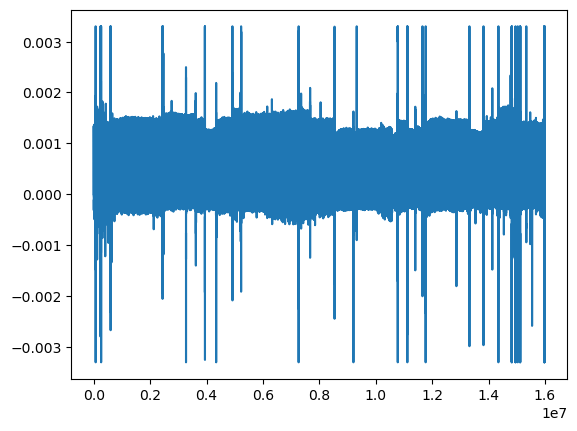

In [26]:
edf_filenames = get_edf_filenames()
edf_fname = edf_filenames[2]
edf_data = import_ecg(edf_fname)
y = edf_data[0][0].T
x = edf_data[0][1]
# start = 2*int(1e5)
# length = 30000 #int(2**14)-3
# y = y[start:start+length]
plt.plot(y)

In [ ]:
all_stages = import_stages()

In [27]:
edfs = {file_name:import_ecg(file_name) for file_name in edf_filenames}

Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CP229110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/WD224010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/TK221110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/VP214110.edf...
EDF file detected
Setting chann

/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)
/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CN223100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LM230010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/VC209100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_

In [29]:
detectors = Detectors(500)
r_peaks = {x:detectors.engzee_detector(edfs[x][0][0].T) for x in edf_filenames}

In [3]:
def plot(y):
    t = np.linspace(0, len(y) / 500, len(y))
    plt.plot(t, y)

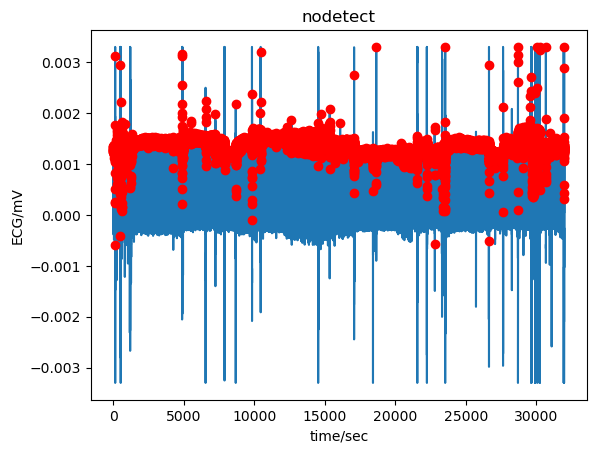

In [30]:
edf_nr = 2
edf_name = edf_filenames[edf_nr]
y = edfs[edf_name][0][0].T
plot_with_peaks(y, r_peaks[edf_name])

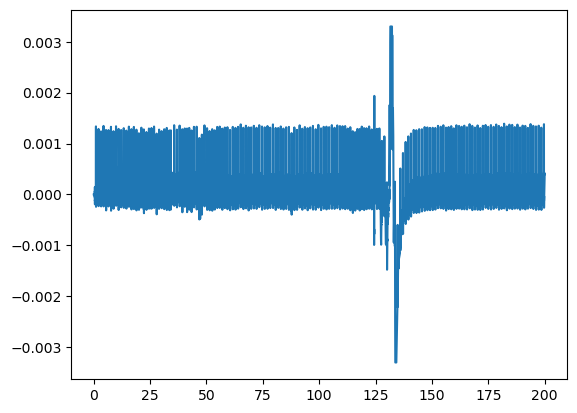

In [4]:
plot(y[:100000])

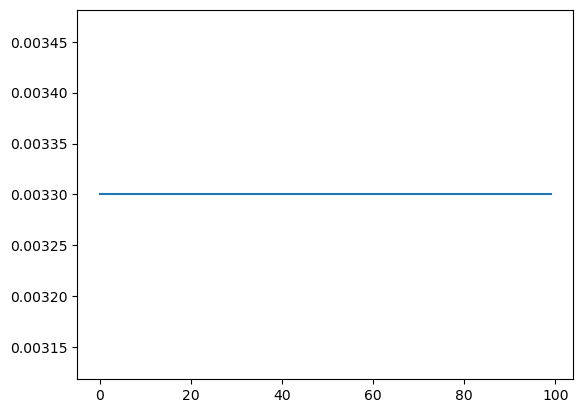

In [20]:
start = int(65800)
stop = int(65900)
plt.plot(y[start:stop])

In [24]:
np.all(y[start:stop]==y[start])

True

In [6]:
y_too_big = np.where(np.abs(y) > 0.0026)
# all in the second part are zeros
np.all(y_too_big[1] == np.zeros(len(y_too_big[1])))
y_too_big = y_too_big[0]
y_too_big

array([   65737,    65738,    65739, ..., 15985438, 15985439, 15985440])

In [7]:
#check if somewhere is only one spike of big value
from imports.test_import import where_only_one_spike

where_only_one_spike(y_too_big, 300)

[600390, 8539971, 11654022, 11661516, 14353713]

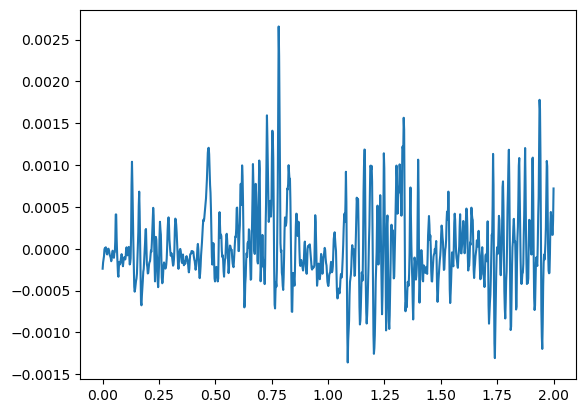

In [15]:
plot(y[600000:601000])

In [8]:
prev_out = [239053,
            239268,
            597141,
            8539478,
            9325021,
            11121791,
            11657716,
            13822261,
            14352361,
            14957537,
            14958344,
            15122094,
            15979459]

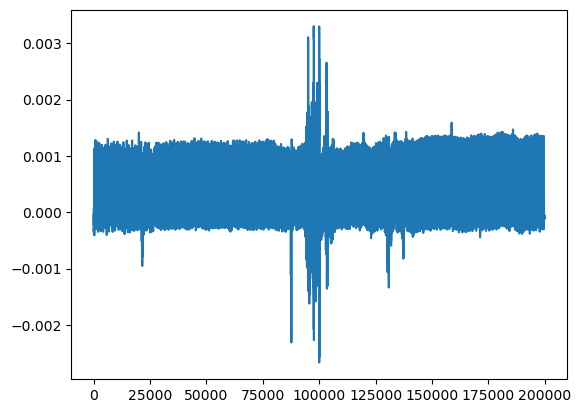

In [9]:
mid = 597141
before_after = 100000
plt.plot(y[mid - before_after:mid + before_after])

In [11]:
r_peaks = Detectors.

SyntaxError: invalid syntax (3340418090.py, line 1)